In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [19]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
children = df[df['Age'] < 16]
children.shape

(83, 12)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

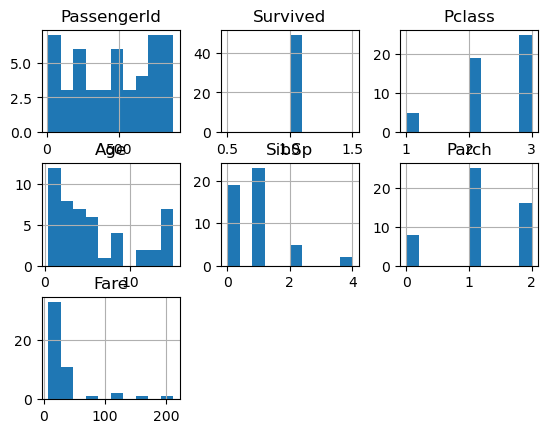

In [21]:
living_children = df[(df['Age'] < 16) & (df['Survived'] == 1)]
living_children.hist()

In [22]:
not_surviving_children = df[(df['Age'] < 16) & (df['Survived'] == 0)]
not_surviving_children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

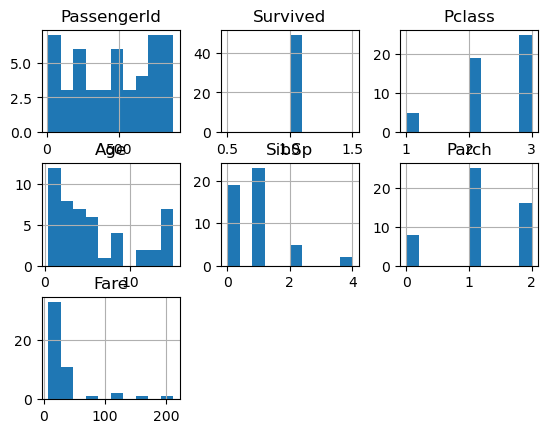

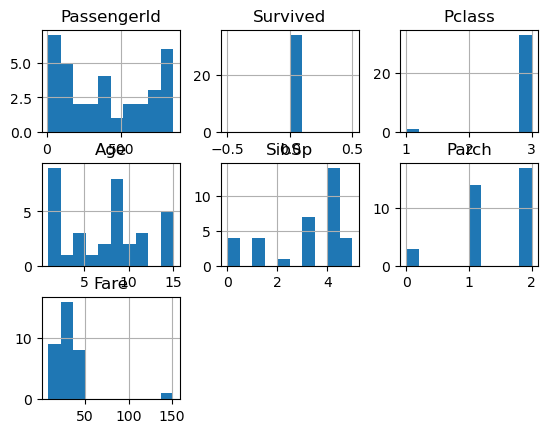

In [23]:
living_children.hist()

not_surviving_children.hist()

In [24]:
women_and_children = df[(df['Sex'] == "female") | (df['Age'] < 16)]
w_a_c_survival_rate = women_and_children['Survived'].value_counts(normalize=True) * 100
w_a_c_survival_rate


Survived
1    71.751412
0    28.248588
Name: proportion, dtype: float64

In [25]:
adult_men = df[(df['Sex'].str.match('male')) & (df['Age'] > 16)]
a_m_survival_rate = adult_men['Survived'].value_counts(normalize=True) * 100
a_m_survival_rate

Survived
0    82.338308
1    17.661692
Name: proportion, dtype: float64

In [26]:
children = df[df['Age'] < 16]
surviving_children = df[(df['Age'] < 16) & (df['Survived'] == 1)]
child_chance_of_survival = surviving_children.shape[0] / children.shape[0]
format(child_chance_of_survival, ".0%")

'59%'

In [27]:
women = df[(df['Sex'] == 'female') & (df['Age'] > 16)]
surviving_women = df[(df['Sex'] == 'female') & (df['Age'] > 16) & (df['Survived'] == 1)]
women_chance_of_survival = surviving_women.shape[0] / women.shape[0]
format(women_chance_of_survival, ".0%")

'77%'

NameError: name 'men_chance_of_survival' is not defined

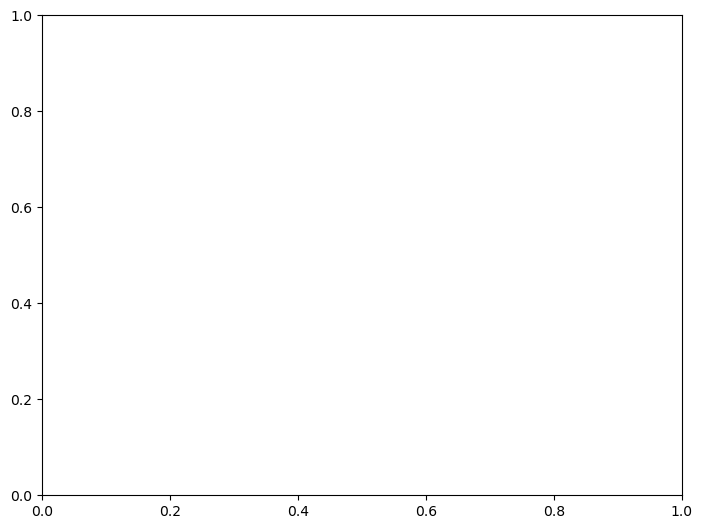

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = ["Children", "Women", "Men"]
data = [child_chance_of_survival, women_chance_of_survival, men_chance_of_survival]
ax.bar(x_axis, data)
plt.show()

In [30]:
surviving_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Survived'] == 1)]
surviving_men.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,71.000000,71.0,71.000000,71.000000,71.000000,71.000000,71.000000
mean,485.267606,1.0,1.873239,34.323944,0.267606,0.126761,46.731869
std,222.128789,0.0,0.955130,11.798032,0.476827,0.411602,85.316448
min,22.000000,1.0,1.000000,17.000000,0.000000,0.000000,0.000000
25%,288.000000,1.0,1.000000,26.500000,0.000000,0.000000,8.050000
50%,513.000000,1.0,1.000000,32.000000,0.000000,0.000000,26.550000
75%,654.500000,1.0,3.000000,41.000000,0.500000,0.000000,54.270850
max,890.000000,1.0,3.000000,80.000000,2.000000,2.000000,512.329200


In [31]:
dead_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Survived'] == 0)]
dead_men.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,331.000000,331.0,331.000000,331.000000,331.000000,331.000000,331.000000
mean,446.972810,0.0,2.383686,33.496979,0.250755,0.166163,22.562523
std,260.482075,0.0,0.779028,12.970596,0.516947,0.566384,33.570494
min,1.000000,0.0,1.000000,17.000000,0.000000,0.000000,0.000000
25%,212.000000,0.0,2.000000,23.000000,0.000000,0.000000,7.854200
50%,443.000000,0.0,3.000000,30.000000,0.000000,0.000000,10.170800
75%,680.000000,0.0,3.000000,40.500000,0.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,3.000000,5.000000,263.000000


In [32]:
third_class_adult_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Pclass'] == 3)]
thrird_class_adult_men_survival_rate = third_class_adult_men['Survived'].value_counts(normalize=True) * 100
thrird_class_adult_men_survival_rate

Survived
0    87.037037
1    12.962963
Name: proportion, dtype: float64

In [33]:
first_class_adult_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Pclass'] == 1)]
first_class_adult_men_survival_rate = first_class_adult_men['Survived'].value_counts(normalize=True) * 100
first_class_adult_men_survival_rate

Survived
0    62.244898
1    37.755102
Name: proportion, dtype: float64

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

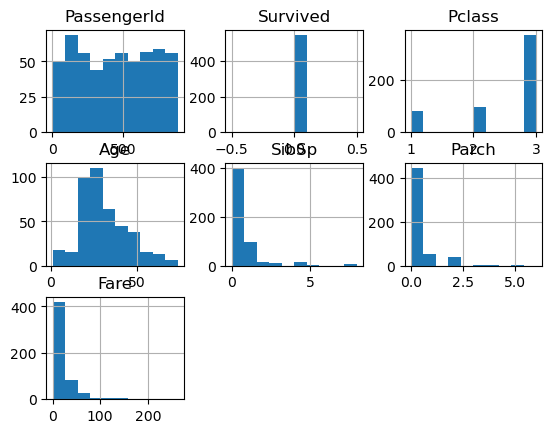

In [34]:
the_dead = df[df["Survived"] == 0]
the_dead.hist()

<Axes: xlabel='Pclass', ylabel='Survived'>

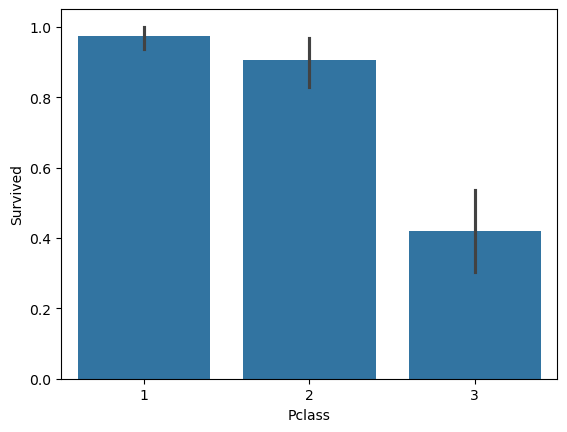

In [38]:
import seaborn as sns

# Assuming 'Pclass' and 'Survived' are columns in the DataFrame 'women'
sns.barplot(x='Pclass', y='Survived', data=women)


<Axes: xlabel='Pclass', ylabel='Survived'>

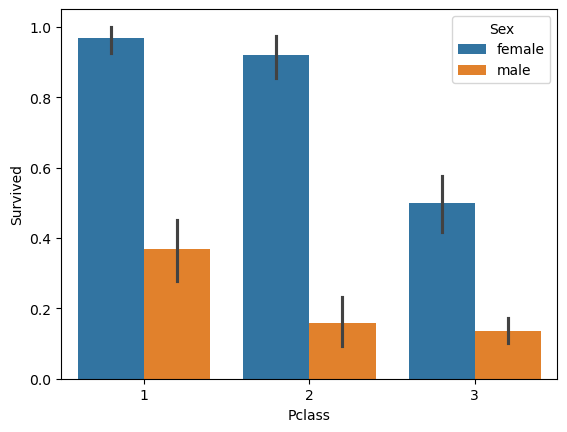

In [39]:
import seaborn as sns

# Assuming 'Pclass', 'Survived', and 'Sex' are columns in the DataFrame 'df'
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)


<Axes: xlabel='Sex', ylabel='Survived'>

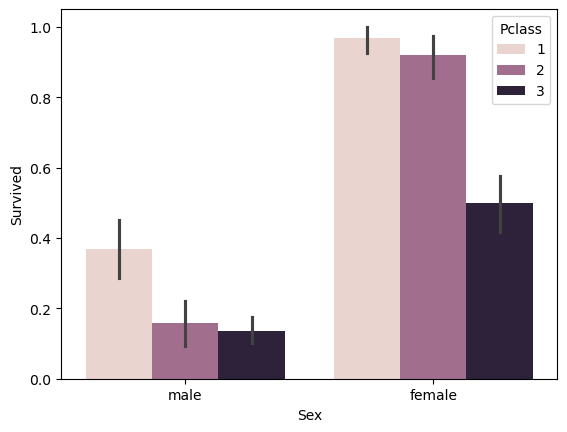

In [40]:
import seaborn as sns

# Assuming 'Sex', 'Survived', and 'Pclass' are columns in the DataFrame 'df'
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df)
